**Problem Statement:** 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
how well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal** 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [51]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding the Data

In [52]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
df.shape

(1460, 81)

**Let's check the percentage missing values in each column:**


In [56]:
print("Percentage of missing values in each column:")
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[round(df.isnull().sum()/len(df.index),2) > 0])

Percentage of missing values in each column:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


**We see that there are more than five features which have missing values greater than 40% percent. The missing values could also just be zeros, so it would be irrational to merely drop these columns. We shall decide what to do with these after a bit of exploratory data analysis**

## Exploratory Data Analysis

### We know a priori that there was a global financial crash in 2008. This had also lead to the crash of the housing bubble. Let us check the median house prices over the years to see if that crash is reflected in our data

Text(0.5, 1.0, 'House Price vs YearSold')

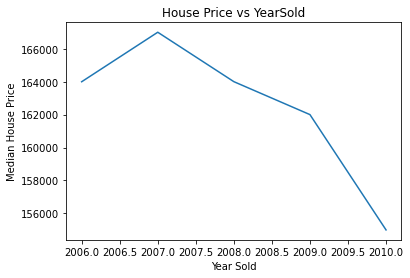

In [57]:
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

We notice that it is, indeed, reflected in our data. The median price of the houses has dropped considerably since the crisis.

Let's check how the age of the buildings affect their price.

In [58]:
#First we take out all the year features from the dataset
years = []

for i in df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        years.append(i)
print(years)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


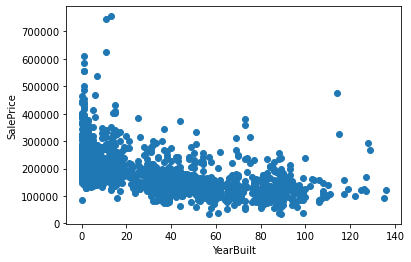

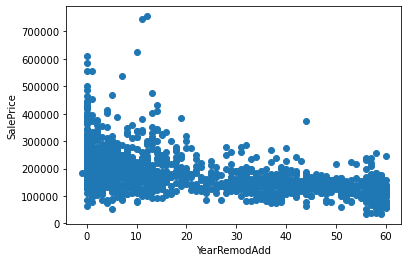

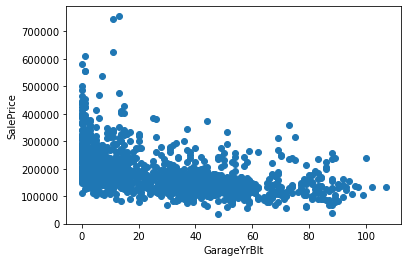

In [59]:
#Comparing all these features 
for feature in years:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


**Clearly, properties that are (a) new, (b) have recently been renovated, and (c) have a recently built garage have a higher selling price.**

**Let's check the features that are numerical and the variables that are not.** 

In [60]:
numbvar = []
catvar = []
for i in df.columns:
    if df[i].dtypes != 'O':
        numbvar.append(i)
    else:
        catvar.append(i)

print("Number of numerical features is", len(numbvar))
print("Number of non-numerical features is", len(catvar))

Number of numerical features is 38
Number of non-numerical features is 43


**Let us look at the heatmap of the numerical variables to see the correlation between them.**

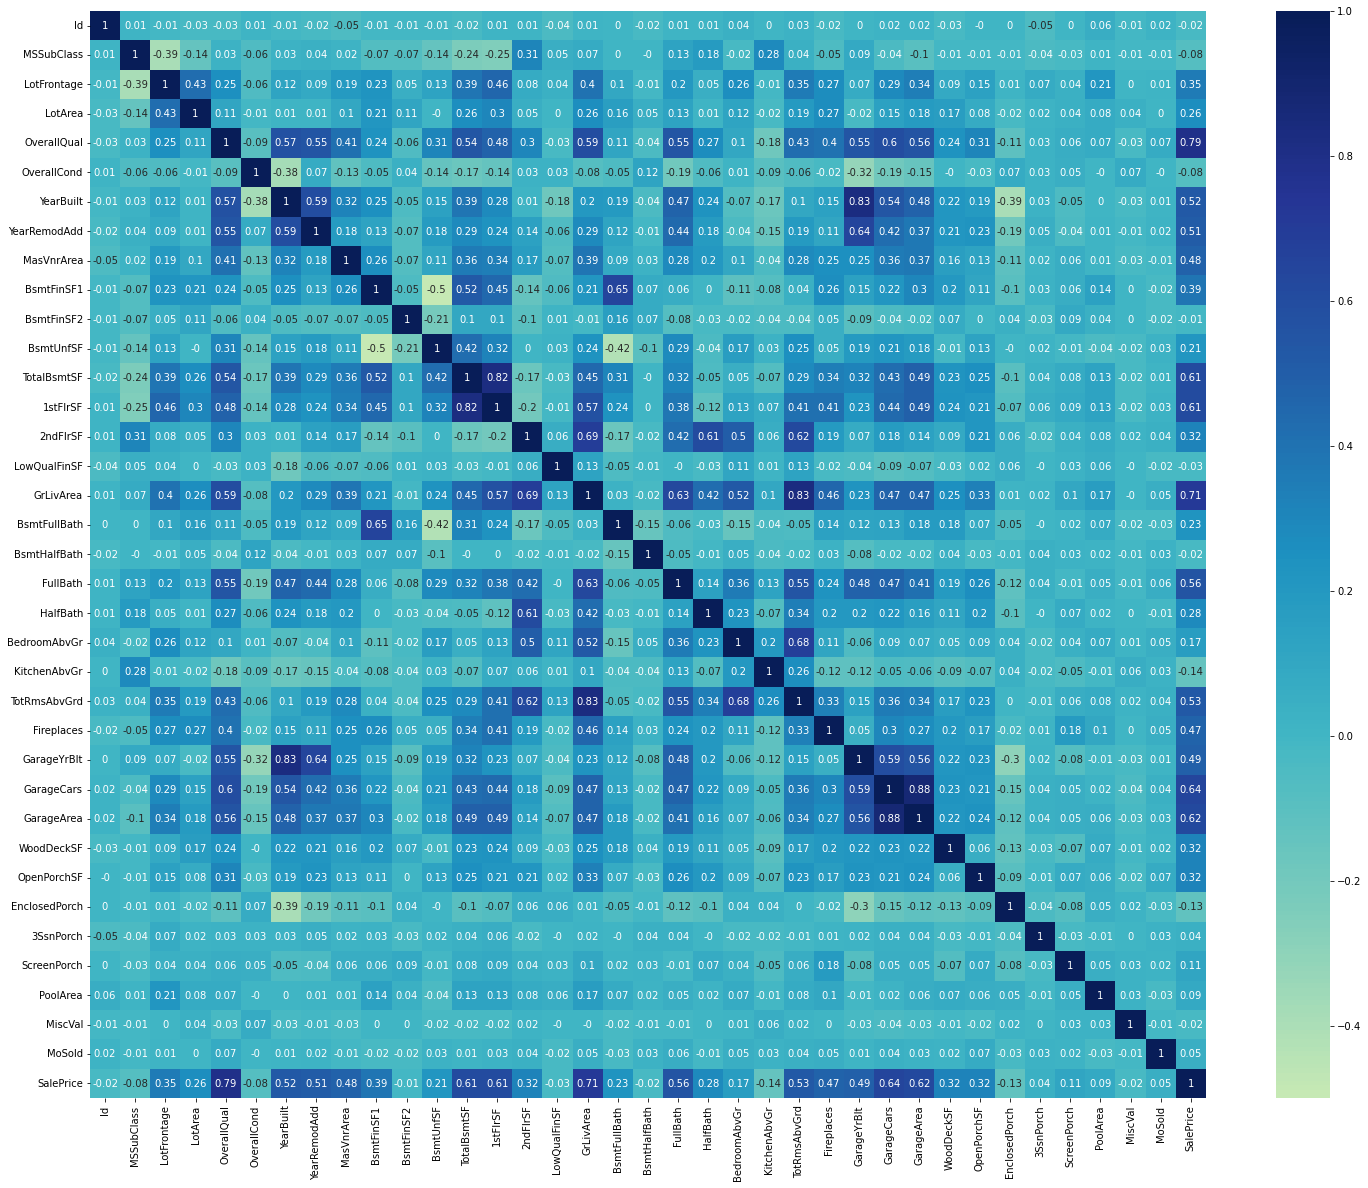

In [61]:
df_num = df.select_dtypes(include=['int64','float64'])

plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='YlGnBu' , annot=True, center = 0)
plt.show()

There are several features that are highly correlated. We will remove them soon. 

Let us look at the correlation between the target variable (SalePrice) and all the other numerical variables. 

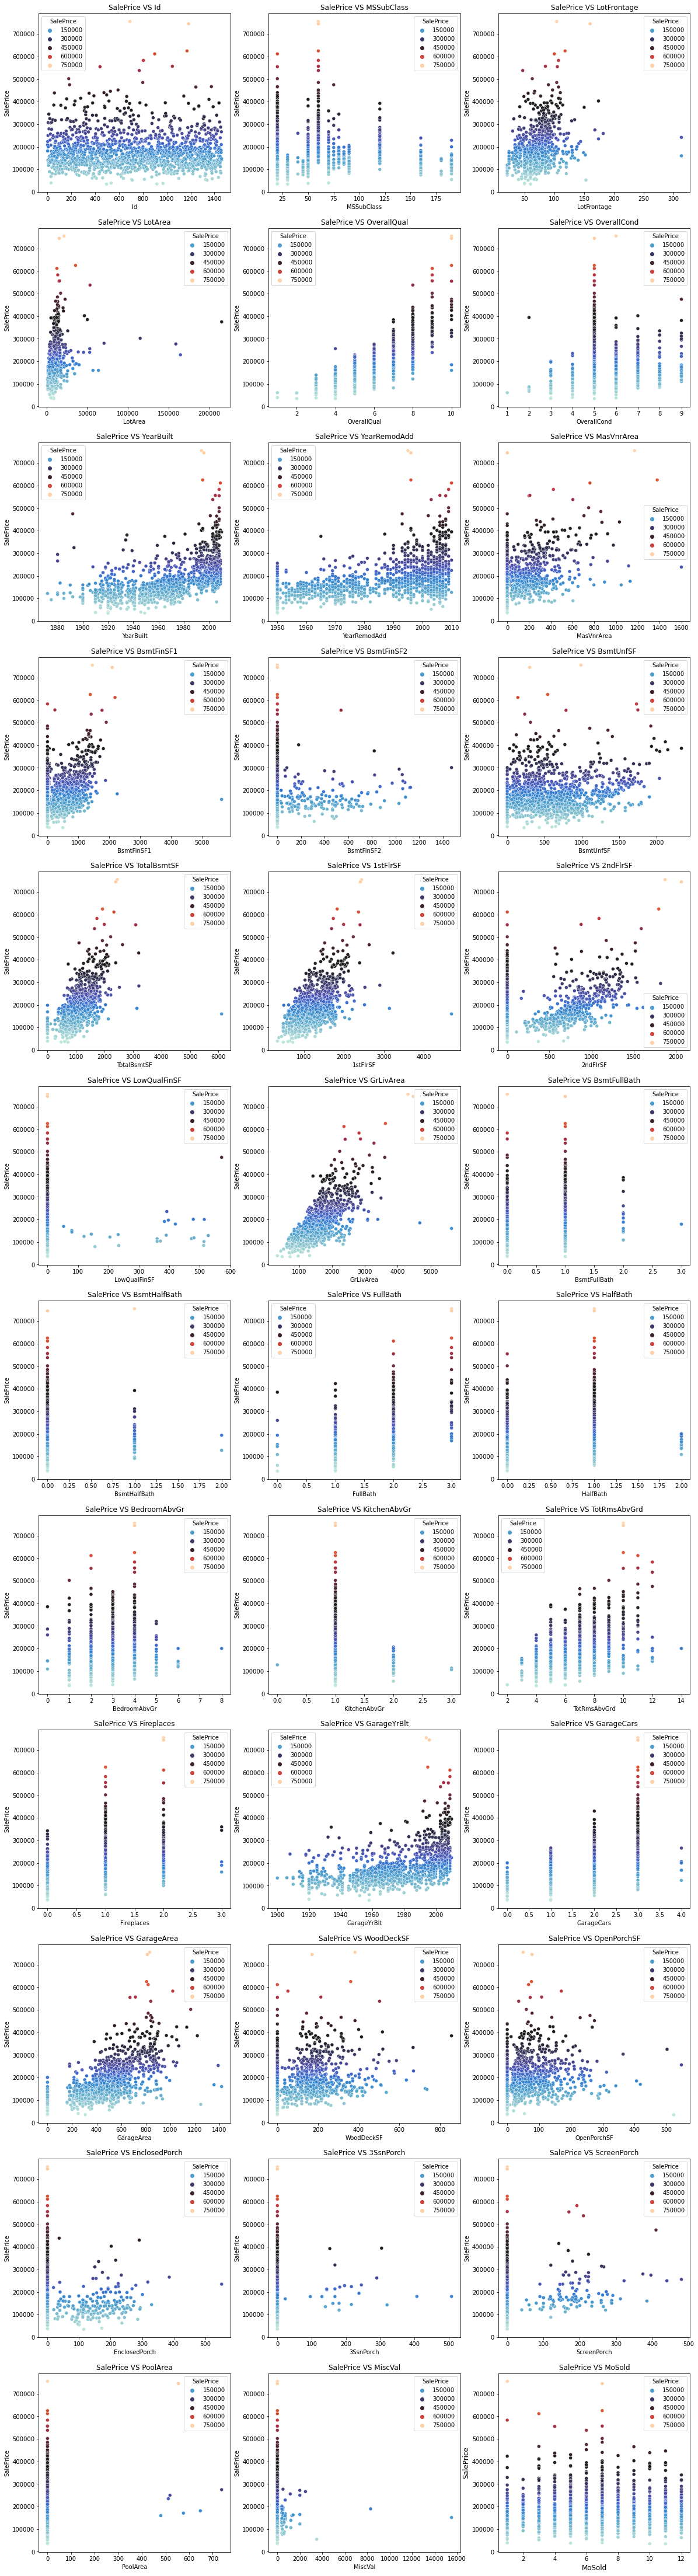

In [62]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

**The following things are clear from the plots:**

- SalePrice incresases with GarageCars
- SalePrice increases with TotRmsAbvGrd
- SalePrice increases with GrLivArea
- SalePrice increases with OverallQual
- SalePrice increases with YearBuilt (newer properties are valued more)

**Now we plot the categorical features versus SalePrice**

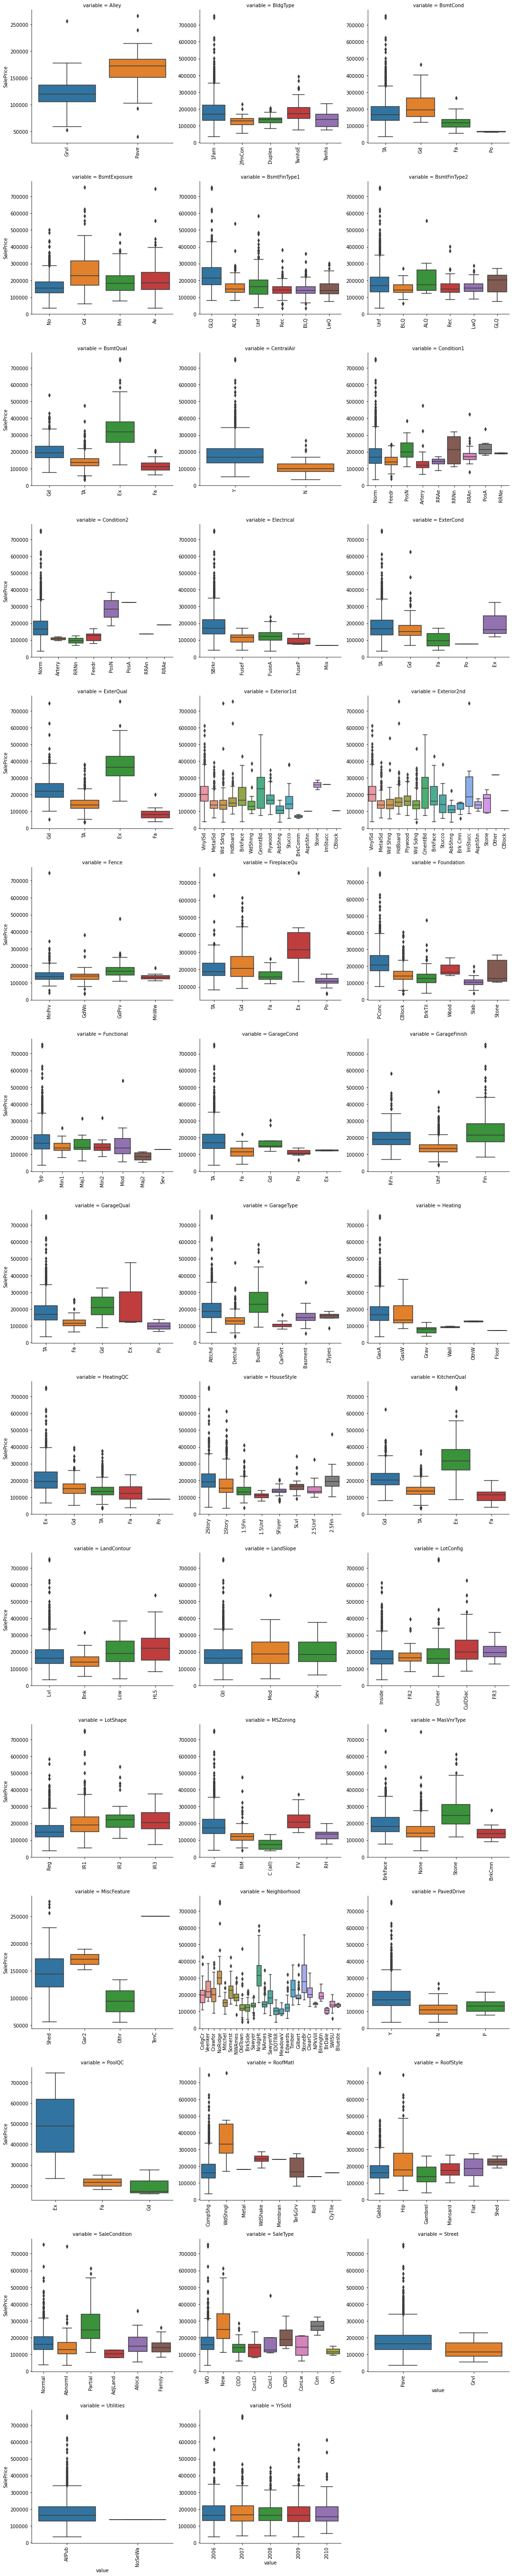

In [63]:
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

## Data Preparation

We realized early that a building's newness (that is, its age) is an important factor in determining its price. Let's create a few variables determining the ages of the house, the garage, and the amount of years it has been since it was remodelled, so that we may incorporate those variables in our dataframe. 

In [64]:
df['houseage'] = df['YrSold'] - df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df["YrSold"] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

We do not need the ID column, so we may drop that as well. 

In [65]:
df.drop('Id',axis=1,inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [67]:
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[round(df.isnull().sum()/len(df.index),2) > 0])

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
garage_age       5.55
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [68]:
#From the Data Description
#NA = No Pool for PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')
#NA = No Alley
df['Alley'] = df['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Fence
df['Fence'] = df['Fence'].fillna('None')
#NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

We find the list of columns with null values again

In [69]:
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),5) > 0 ] )


LotFrontage    17.74
Electrical      0.07
dtype: float64


First consider LotFrontage: To determine whether we should replace the missing values with zeros or medians or to just drop the column altogeher, let us look again at the graph of LotFrontage with the target variable.

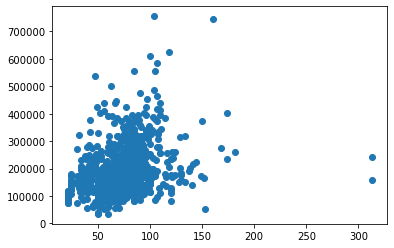

In [70]:
plt.scatter(df.LotFrontage,df.SalePrice)

It seems that the relationship is not that clear. It is not a bad idea to drop the column altogether, especially since we also know from the heatmap that LotFrontage is correlated to a lot of other variables... Thus, the other variables may easily compensate for its absence. Dropping LotFrontage. 

In [71]:
df.drop('LotFrontage',axis=1,inplace=True)

Now, consider Electrical. We may replace the missing values with the mode of the column, because they are very few. 

In [72]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


Checking for null values:

In [73]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)


MSSubClass      0.0
1stFlrSF        0.0
GarageArea      0.0
GarageCars      0.0
GarageFinish    0.0
               ... 
ExterCond       0.0
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
remodel_age     0.0
Length: 81, dtype: float64

Next, we know from the data dictionary that MSSubClass, YrSold, and MoSold are actually supposed to be treated as strings. So let us first convert them into strings.

In [74]:
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseage,garage_age,remodel_age
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,0,2,2008,WD,Normal,208500,5,TA,5
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,0,5,2007,WD,Normal,181500,31,TA,31
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,0,9,2008,WD,Normal,223500,7,TA,6
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,0,2,2006,WD,Abnorml,140000,91,TA,36
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,0,12,2008,WD,Normal,250000,8,TA,8


Checking the shape of the dataframe again

In [75]:
df.shape

(1460, 81)

In [76]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseage,garage_age,remodel_age
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,0,2,2008,WD,Normal,208500,5,TA,5
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,0,5,2007,WD,Normal,181500,31,TA,31
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,0,9,2008,WD,Normal,223500,7,TA,6
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,0,2,2006,WD,Abnorml,140000,91,TA,36
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,0,12,2008,WD,Normal,250000,8,TA,8


Getting Dummy Variables

In [77]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)

In [78]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,garage_age_Ex,garage_age_Fa,garage_age_Gd,garage_age_None,garage_age_Po,garage_age_TA
0,8450,7,5,2003,2003,196.0,706,0,150,856,...,0,0,1,0,0,0,0,0,0,1
1,9600,6,8,1976,1976,0.0,978,0,284,1262,...,0,0,1,0,0,0,0,0,0,1
2,11250,7,5,2001,2002,162.0,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
3,9550,7,5,1915,1970,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,0,1
4,14260,8,5,2000,2000,350.0,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1


In [79]:
df.shape

(1460, 338)

In [80]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [81]:
X.shape

(1460, 337)

## Model Building

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

#List of parameters to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ] }


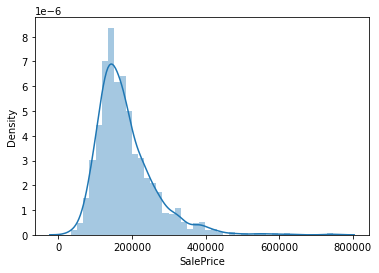

In [83]:
#Checking the target variable's values
sns.distplot(y_train)
plt.show()

In [84]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

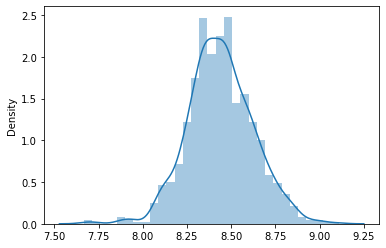

In [85]:
sns.distplot(y_train)
plt.show()

In [86]:
# Scaling the data using a Minmax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Lasso Regression

In [87]:
lasso = Lasso()

#Cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.027609,-0.044969
1,{'alpha': 0.001},-0.029818,-0.040452
2,{'alpha': 0.01},-0.045107,-0.048783
3,{'alpha': 0.05},-0.079814,-0.080319
4,{'alpha': 0.1},-0.113318,-0.113699


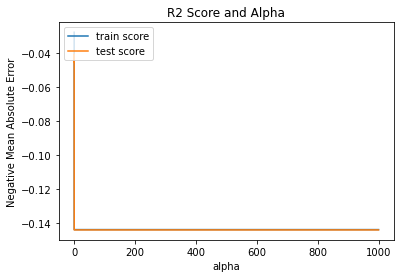

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [90]:
model_cv.best_params_

{'alpha': 0.001}

In [91]:
# Lasso Model for best param
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.94
Test R2 Square :  0.91


In [92]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
lasso_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
lasso_params.sort_values(by=['Coeff'], ascending=False,inplace=True)
lasso_params.head(10)

,Feature,Coeff
0,constant,[8.44]
9,GrLivArea,0.051
2,OverallQual,0.032
8,TotalBsmtSF,0.019
3,OverallCond,0.016
4,YearBuilt,0.015
18,GarageArea,0.012
5,YearRemodAdd,0.01
6,BsmtFinSF1,0.009
42,Neighborhood_Crawfor,0.009


### Ridge Regression

In [93]:
ridge = Ridge()

#Cross validation
ridgefolds = 5
model_cvr = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)    

model_cvr.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
cv_results_r = pd.DataFrame(model_cvr.cv_results_)
cv_results_r[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.027477,-0.046933
1,{'alpha': 0.001},-0.027477,-0.046935
2,{'alpha': 0.01},-0.027480,-0.046953
3,{'alpha': 0.05},-0.027491,-0.047010
4,{'alpha': 0.1},-0.027500,-0.047048


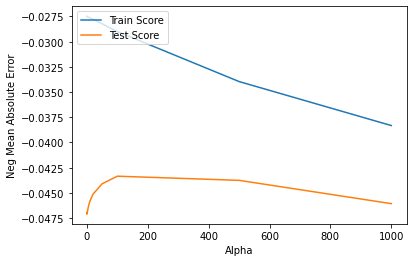

In [95]:
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('int32')

#Plotting
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel("Alpha")
plt.ylabel("Neg Mean Absolute Error")
plt.legend(['Train Score', 'Test Score'], loc='upper left')
plt.show()

In [96]:
model_cvr.best_params_

{'alpha': 100}

In [97]:
ridge = Ridge(alpha=model_cvr.best_params_['alpha'])
ridge.fit(X_train, y_train)

y_pred_ridge_train = ridge.predict(X_train)
print('Train R2 Score:', round(r2_score(y_train, y_pred_ridge_train),2))

y_pred_ridge_test = ridge.predict(X_test)
print('Test R2 Score:', round(r2_score(y_test, y_pred_ridge_test),2))

Train R2 Score: 0.95
Test R2 Score: 0.9


In [98]:
model_parameters_r = list(ridge.coef_)
model_parameters_r.insert(0, ridge.intercept_)

model_parameters_r = [np.round(x,3) for x in model_parameters_r]

cols_r = X.columns
cols_r = cols.insert(0,'constant')

var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
ridge_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
ridge_params.sort_values(by=['Coeff'], ascending=False,inplace=True)
ridge_params.head(10)


,Feature,Coeff
0,constant,[8.44]
9,GrLivArea,0.051
2,OverallQual,0.032
8,TotalBsmtSF,0.019
3,OverallCond,0.016
4,YearBuilt,0.015
18,GarageArea,0.012
5,YearRemodAdd,0.01
6,BsmtFinSF1,0.009
42,Neighborhood_Crawfor,0.009


### The following are the five best predictor variables (variables that are significant in predicting the price of a house) according to Lasso and Ridge:

### 1. GrLivArea: Above grade (ground) living area square feet 
### 2. OverallQual: Rates the overall material and finish of the house
### 3. TotalBsmtSF: Total square feet of basement area
### 4. OverallCond: Rates the overall condition of the house
### 5. YearBuilt: Original construction date

### **The tables above indicate how well these variables predict the output (sale price of a house).**

### The optimal Alpha value for Lasso is 0.01 and for Ridge it is 100